In [1]:
# Content from Proakis
# Code © 2019, Alexander Kain
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

import sympy as sym
sym.init_printing(use_unicode=True)

# The Discrete Fourier Transform: Its Properties and Applications

So far, the Fourier Transform $X(\omega)$ of the sequence $x[n]$ was a continuous function of frequency. We now consider a discrete frequency-domain representation, the discrete Fourier Transform (DFT)

## 7.1. Frequency-Domain Sampling: The Discrete Fourier Transform

Suppose we sample

$$ X(\omega) = \sum_{n=-\infty}^{\infty} x[n] e^{-j \omega n} $$

periodically at $\omega = 2 \pi k / N$:

![](Fig7.1.1.png )

Then

$$ X(2 \pi k / N) = \sum_{n=-\infty}^{\infty} x[n] e^{-j 2 \pi k n / N}, k=0, 1, \ldots, N-1 $$

Let us sub-divide the summation into an infinite number of summations containing $N$ terms:

$$ X(2 \pi k / N) = 
\sum_{l=-\infty}^{\infty} 
\sum_{n=lN}^{lN+N-1}
x[n] e^{-j 2 \pi k n / N}= $$

$$ \sum_{n=lN}^{lN+N-1}
\sum_{l=-\infty}^{\infty} 
x[n] e^{-j 2 \pi k n / N} = $$

Let $n \rightarrow n - lN$:

$$ X(2 \pi k / N) = \sum_{n=0}^{N-1}
\sum_{l=-\infty}^{\infty} 
x[n-lN] e^{-j 2 \pi k (n - lN) / N} = $$

$$ \sum_{n=0}^{N-1}
\left(
\sum_{l=-\infty}^{\infty} 
x[n-lN]
\right)
e^{-j 2 \pi k n / N} $$

The term in parentheses

$$ x_p[n] = \sum_{l=-\infty}^{\infty} x[n-lN] $$

is periodic with fundamental period $N$. Therefore, it can be written as a Fourier Series:

$$ x_p[n] = \sum_{k=0}^{N-1} c_k e^{j 2 \pi k n / N}, n=0, 1, \ldots, N-1 $$

with Fourier coefficients

$$ c_k = \frac{1}{N} \sum_{n=0}^{N-1} x_p[n] e^{-j 2 \pi k n / N}, k=0, 1, \ldots, N-1 $$

Comparing this to the formula for $X(2 \pi k / N)$, we find that

$$ c_k = \frac{1}{N} X(2 \pi k / N) $$

and

$$ x_p[n] = \frac{1}{N} \sum_{k=0}^{N-1} X(2 \pi k / N) e^{j 2 \pi k n / N}, n=0, 1, \ldots, N-1 $$

This relationship provides the reconstruction of the periodic signal $x_p[n]$ from the samples of the spectrum $X(\omega)$.

However, we would like to also recover $x[n]$ and $X(\omega)$. The former can be recovered from $x_p[n]$ if there is no *time-domain aliasing*, that is, $x[n]$ is time-limited to less than the period $N$. 

![](Fig7.1.2.png )

If there is no time-domain aliasing, i.e.

$$
x[n] = 
\begin{cases}
x_p[n], & 0 \leq n \leq N-1 \\
0, & \textrm{elsewhere} \\
\end{cases}
$$

it is possible to express $X(\omega)$ in terms of its samples. Since $x[n]$ is time-limited we can use appropriate integral boundaries

$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X(2 \pi k / N) e^{j 2 \pi k n / N}, n=0, 1, \ldots, N-1 $$

Now taking the Fourier Transform

$$ X(\omega) = \sum_{n=0}^{N-1} 
\left(
\frac{1}{N} \sum_{k=0}^{N-1} X(2 \pi k / N) e^{j 2 \pi k n / N}
\right)
e^{-j \omega n} = 
$$

$$ 
\sum_{k=0}^{N-1} X(2 \pi k / N) 
\left(
\frac{1}{N}
\sum_{n=0}^{N-1} 
e^{-j (\omega - 2 \pi k / N) n}
\right)
$$

The inner term in parentheses represents the interpolation function (shifted by $2 \pi k / N$ in frequency). Let us define the unshifted version

$$ P(\omega) = \frac{1}{N} \sum_{n=0}^{N-1} e^{-j \omega n} = \frac{1}{N} \frac{1 - e^{-j \omega N}}{1 - e^{-j \omega}} $$

$$ = \frac{\sin (\omega N / 2)}{N \sin (\omega / 2)} e^{-j \omega (N-1) / 2} $$

This is the periodic counterpart to the familiar sinc function. Then

$$ X(\omega) = \sum_{k=0}^{N-1} X(2 \pi k / N) P(\omega - 2 \pi k / N) $$

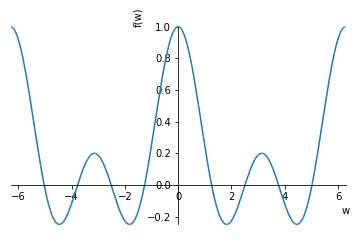

In [2]:
# visualize part of interpolation function P
w = sym.symbols('w', real=True)
N, k = sym.symbols('N k', integer=True)
P = sym.sin(w * N / 2) / (N * sym.sin(w / 2)) 

sym.plot(P.subs({N: 5}), (w, -2 * sym.pi, 2 * sym.pi));

$P(\omega)$ has the property that $P(0)$ = 1 and 

$$P(\frac{2 \pi k}{N}) = 0, k=1, 2, \ldots, N-1$$

Consequently, the interpolation function gives exactly the sample values $X(2\pi j / N)$ for $\omega=2 \pi k / N$; for all other frequencies the result is a linear combination of the original spectral samples.

### 7.1.2. The Discrete Fourier Transform

In general, the equally-spaced frequency samples $X(2 \pi k / N), k=0, 1, \ldots, N-1$ do *not* uniquely represent the original sequence $x[n]$; instead they correspond to a periodic sequence $x_p[n]$ of period $N$ where $x_p[n]$ may be an aliased version of $x[n]$

$$x_p[n] = \sum_{l=-\infty}^{\infty} x[n-lN]$$

When the sequence $x[n]$ has a finite duration of length $L \leq N$, then $x_p[n]$ is simply a periodic repetition of $x[n]$, where

$$x_p[n] = \begin{cases}
x[n], & 0 \leq n \leq L-1 \\
0   , & L \leq n \leq N-1 \\
\end{cases}
$$

In this case the frequency samples *uniquely* represent the finite-duration sequence $x[n]$, and the Fourier Transform is

$$ X(\omega)=\sum_{n=0}^{L-1} x[n] e^{-j \omega n}$$

When we sample this we obtain

$$X[k] \equiv X(2 \pi k / N) = \sum_{n=0}^{L-1} x[n] e^{-j 2 \pi k n / N}$$

and without loss of generality we can increase the upper index in the sum to $N-1$:

<font color=red>
$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2 \pi k n / N}, k=0,1,2, \ldots, N-1 $$
</font>

which is the *discrete Fourier Transform* (DFT). The inverse DFT (IDFT) is

<font color=red>
$$ x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j 2 \pi k n / N}, n=0, 1, \ldots, N-1 $$
</font>

#### Example 7.1.2

A finite-duration sequence of length $L$ is given as


$$x[n] = \begin{cases}
1, & 0 \leq n \leq L-1 \\
0   , & \textrm{otherwise} \\
\end{cases}
$$

Determine the DFT of this sequence for $N \geq L$:

$$X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2 \pi k n / N}, k=0,1,2, \ldots, N-1 $$

The Fourier Transform is

$$X(\omega) = \sum_{n=0}^{L-1} x[n] e^{-j \omega n}$$
$$ = \sum_{n=0}^{L-1} e^{-j \omega n} = \frac{1 - e^{-j \omega L}}{1 - e^{-j \omega}}$$

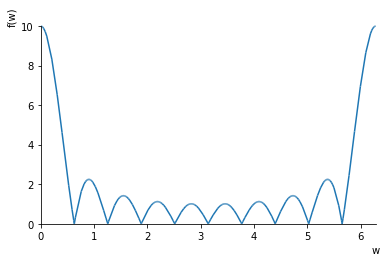

In [3]:
# code here
w = sym.symbols('w', real=True)
L, N, k = sym.symbols('L N k', integer=True)
X = (1 - sym.exp(-1j * w * L)) / (1 - sym.exp(-1j * w))

sym.plot(sym.Abs(X.subs({L: 10})), (w, 0, 2 * sym.pi));

Clearly, at $X(0) = L$.

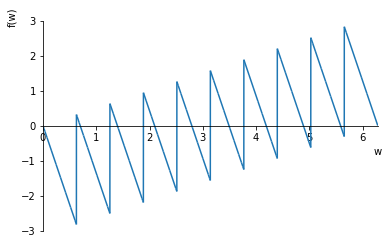

In [4]:
sym.plot(sym.arg(X.subs({L: 10})), (w, 0, 2 * sym.pi));

The DFT is $X(\omega)$ evaluated at $\omega = 2 \pi k / N$:

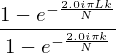

In [5]:
X.subs({w: 2 * sym.pi * k / N})

If $N=L$ then:

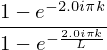

In [6]:
X.subs({w: 2 * sym.pi * k / L})

which is zero for any $k=1, 2, \ldots, L - 1$, in other words


$$X[k] = \begin{cases}
L, & k = 0\\
0   , & k = 1, 2, \ldots, L-1  \\
\end{cases}
$$

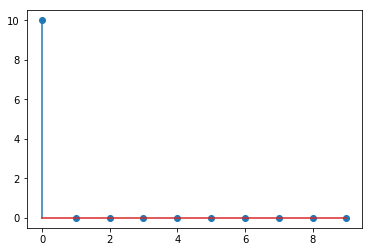

In [7]:
# calculate this numerically as opposed to analytically
from numpy.fft import fft  # fft is a fast *implementation* of the dft

L = 10
x = np.ones(L)
plt.stem(abs(fft(x)));  # N = L

Although the $L$-point DFT is sufficient to uniquely represent the sequence $x[n]$ in the frequency domain, one can see that it does not provide sufficient detail to give a good picture of the underlying spectral characteristics of $x[n]$. We can interpolate $X(\omega)$ at more closely-spaced frequencies by increasing $N$, which is equivalent to appending $N-L$ zeros to the sequence, also known as *zero padding*:

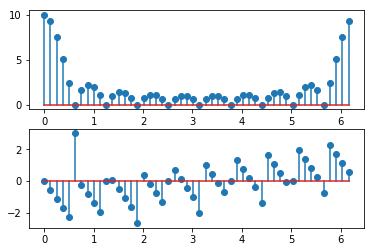

In [11]:
N = 50  # try 50 or 100
w = np.arange(N) * 2 * np.pi / N
plt.subplot(2,1,1)
plt.stem(w, abs(fft(x, N)));  # second argument specifies the desired # of points
plt.subplot(2,1,2)
plt.stem(w, np.angle(fft(x, N)));  # note what happens when the magnitude is zero

### 7.1.4. Relationship of the DFT to Other Transforms

#### Relationship to the Fourier series coefficients of a period sequence

A periodic sequence can be represented in the form

$$ x_p[n] = \sum_{k=0}^{N-1} c_k e^{j 2 \pi n k / N} $$

where the Fourier coefficients are

$$ c_k = \frac{1}{N} \sum_{n=0}^{N-1} x_p[n] e^{-j 2 \pi n k / N}, k=0, 1, \ldots, N-1$$

In comparison, we see that this has the identical form of a DFT; if we let $x[n] = x_p[n], n=0, 1, \ldots, N-1$, then the DFT is

$$X[k] = N c_k$$

In conclusion, the $N$-point DFT provides the line spectrum of the periodic extension of a finite signal $x[n]$.

#### Relationship fo the Fourier transform of an aperiodic sequence

We have already shown that given a periodic finite sequence $x[n]$ with Fourier transform $X(\omega)$, if we sample the spectrum

$$X[k] = X(\omega)|_{\omega=2 \pi k / N} = \sum_{n=-\infty}^{\infty} x[n] e^{-j 2 \pi n k / N}, k=0, 1, \ldots, N-1 $$

then the $X[k]$ are the DFT coefficients of the periodic sequence

$$x_p[n] = \sum_{l=-\infty}^{\infty} x[n-lN]$$

The finite-duration sequence

$$\hat{x}[n] = \begin{cases}
x_p[n], & 0 \leq n \leq N-1 \\
0   , & \textrm{otherwise} \\
\end{cases}
$$

is distinct from the original sequence $x[n]$, unless $x[n]$ has finite duration of length $L \leq N$, in which case $\hat{x}[n] = x[n]$, and the IDFT of $X[k]$ will return the original sequence $x[n]$.

#### Relationship to the $z$-transform

Consider a sequence $x[n]$ with $z$-transform

$$ X(z) = \sum_{n=-\infty}^{\infty} x[n] z^{-n} $$

with a ROC that includes the unit circle. If $X(z)$ is sampled we obtain

$$ X[k] = X(z)|_{z = e^{j 2 \pi n k / N}}, k=0, 1, \ldots, N-1 $$

$$ = \sum_{n=-\infty}^{\infty} x[n] e^{-j 2 \pi n k / N} $$

If the sequence $x[n]$ has finite duration of length $\leq N$, the sequence can be recovered from its $N$-point DFT; thus its $z$-transform is uniquely determined by its $N$-point DFT as follows:

$$ X(z) = \sum_{n=0}^{N-1} x[n] z^{-n} $$

$$ = \sum_{n=0}^{N-1} \left( 
\frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j 2 \pi k n / N}
\right) z^{-n} $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} X[k]
\sum_{n=0}^{N-1} e^{j 2 \pi k n / N}
z^{-n} $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} X[k]
\sum_{n=0}^{N-1} 
\left(
e^{j 2 \pi k / N} z^{-1}
\right)^n $$

$$ = \frac{1}{N} \sum_{k=0}^{N-1} X[k]
\frac{1 - (e^{j 2 \pi k})^{N-1} z^{-N}}{1 - e^{j 2 \pi k / N} z^{-1}}
$$

$$ = \frac{1 - z^{-N}}{N} \sum_{k=0}^{N-1}
\frac{X[k]}{1 - e^{j 2 \pi k / N} z^{-1}}
$$

When this expression is evaluated on the unit circle:

$$ X(\omega) = \frac{1 - e^{-j \omega N}}{N} \sum_{k=0}^{N-1}
\frac{X[k]}{1 - e^{j 2 \pi k / N} e^{-j \omega}}
$$

$$ = \frac{1 - e^{-j \omega N}}{N} \sum_{k=0}^{N-1}
\frac{X[k]}{1 - e^{-j (\omega - 2 \pi k / N)}}
$$

it gives an expression for the Fourier Transform in terms of a polynomial (Lagrange) interpolation formula; this is reducable to the interpolation formula seen earlier.